# Melbourne Housing Price Prediction

## Loading Libraries

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


from sklearn.preprocessing import StandardScaler, LabelEncoder

# Set Matplotlib defaults
plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)


## Loading the data set

In [2]:
path = "melb_data.csv"
df = pd.read_csv(path)
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


## Basic insights of the data set

In [3]:
print( "The data set has ",df.shape[0], "rows ", "and",df.shape[1], "columns")

The data set has  13580 rows  and 21 columns


In [4]:
print(df.columns.tolist())

['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG', 'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude', 'Longtitude', 'Regionname', 'Propertycount']


#### Checkind for data types, missing values , duplicates and number of unique values

In [5]:
def summary(df):
    summary_df = pd.DataFrame(df.dtypes, columns=['dtypes'])
    
    summary_df['Missing:np.nan'] = (df.isnull()).sum()
    summary_df['Missing:None'] = (df == "None").sum()
    summary_df['total'] = summary_df['Missing:np.nan'] + summary_df['Missing:None']
    summary_df['Percent'] = 100*summary_df['total']/len(df)
    summary_df['Duplicates'] = df.duplicated().sum()
    summary_df['Unique'] = df.nunique().values
    summary_df['Count'] = df.count().values
    return summary_df.sort_values(ascending = False, by = 'Percent')

summary(df).style.background_gradient(cmap='Blues')

,dtypes,Missing:np.nan,Missing:None,total,Percent,Duplicates,Unique,Count
BuildingArea,float64,6450,0,6450,47.496318,0,602,7130
YearBuilt,float64,5375,0,5375,39.580265,0,144,8205
CouncilArea,object,1369,0,1369,10.081001,0,33,12211
Car,float64,62,0,62,0.456554,0,11,13518
Suburb,object,0,0,0,0.000000,0,314,13580
Bathroom,float64,0,0,0,0.000000,0,9,13580
Regionname,object,0,0,0,0.000000,0,8,13580
Longtitude,float64,0,0,0,0.000000,0,7063,13580
Lattitude,float64,0,0,0,0.000000,0,6503,13580
Landsize,float64,0,0,0,0.000000,0,1448,13580


## Data preprocessing - Data cleaning

#### Handling Missing Values
* Drop columns with high percentage of missing values and columns does not provide usful information
* Drop the rest of the missind values from the rows

In [6]:
df.drop(["BuildingArea","YearBuilt","Postcode","Date"], axis = 1, inplace = True)

In [7]:
df.dropna(axis =0, inplace = True)

In [8]:
df.shape

(12211, 17)

# EDA

In [9]:
df_uniques = df.nunique()
categorical_variables = list(df_uniques[df_uniques <=10].index)
numeric_variables = list(set(df.columns) - set(categorical_variables))
print("Categorical variables:", categorical_variables)
print("  ")
print("Numeric variables:", numeric_variables)

Categorical variables: ['Rooms', 'Type', 'Method', 'Bathroom', 'Regionname']
  
Numeric variables: ['Price', 'Car', 'SellerG', 'Address', 'Distance', 'Lattitude', 'Bedroom2', 'CouncilArea', 'Longtitude', 'Propertycount', 'Landsize', 'Suburb']


In [10]:
# lets view the unique values for eatch categoric variable
z = [[i, list(df[i].unique())] for i in categorical_variables]
z =pd.DataFrame(data = z,  columns = ['Feature', 'Classes'])
z

,Feature,Classes
0,Rooms,"[2, 3, 4, 1, 6, 5, 8, 7, 10]"
1,Type,"[h, u, t]"
2,Method,"[S, SP, PI, VB, SA]"
3,Bathroom,"[1.0, 2.0, 3.0, 4.0, 0.0, 7.0, 5.0, 6.0, 8.0]"
4,Regionname,"[Northern Metropolitan, Western Metropolitan, ..."


#### from the previous output, the features `Rooms` and `Bathroom` are ordinal, the rest of the features are nomial

### Summary Statistics

In [11]:
num_cols = df[numeric_variables]
num_cols.describe().T.style.background_gradient(cmap='Blues')

,count,mean,std,min,25%,50%,75%,max
Price,12211.000000,1063691.871919,638861.334651,85000.000000,640000.000000,895000.000000,1320000.000000,9000000.000000
Car,12211.000000,1.574073,0.950699,0.000000,1.000000,1.000000,2.000000,10.000000
Distance,12211.000000,9.764368,5.507993,0.000000,5.900000,9.200000,12.600000,47.400000
Lattitude,12211.000000,-37.809054,0.075242,-38.182550,-37.855600,-37.802200,-37.757735,-37.457090
Bedroom2,12211.000000,2.868397,0.969456,0.000000,2.000000,3.000000,3.000000,20.000000
Longtitude,12211.000000,144.993148,0.098867,144.431810,144.929900,144.998580,145.054200,145.526350
Propertycount,12211.000000,7452.984358,4369.616618,249.000000,4380.000000,6567.000000,10331.000000,21650.000000
Landsize,12211.000000,545.044550,4178.733246,0.000000,161.000000,401.000000,645.000000,433014.000000


In [12]:
cat_cols = df[categorical_variables]

def value_counts(dataframe):
    for i in dataframe:
        print("\n"+ "For " + i)
        print (dataframe[i].value_counts())
        print ("_"*35)
value_counts(cat_cols) 


For Rooms
3     5198
2     3491
4     2269
1      670
5      507
6       58
7       10
8        7
10       1
Name: Rooms, dtype: int64
___________________________________

For Type
h    8204
u    2962
t    1045
Name: Type, dtype: int64
___________________________________

For Method
S     8111
SP    1536
PI    1416
VB    1067
SA      81
Name: Method, dtype: int64
___________________________________

For Bathroom
1.0    6918
2.0    4341
3.0     791
4.0      94
0.0      34
5.0      24
6.0       5
7.0       2
8.0       2
Name: Bathroom, dtype: int64
___________________________________

For Regionname
Southern Metropolitan         4340
Northern Metropolitan         3554
Western Metropolitan          2668
Eastern Metropolitan          1229
South-Eastern Metropolitan     325
Eastern Victoria                44
Northern Victoria               26
Western Victoria                25
Name: Regionname, dtype: int64
___________________________________


## Distribution of the target variable

<AxesSubplot:xlabel='Price', ylabel='Count'>

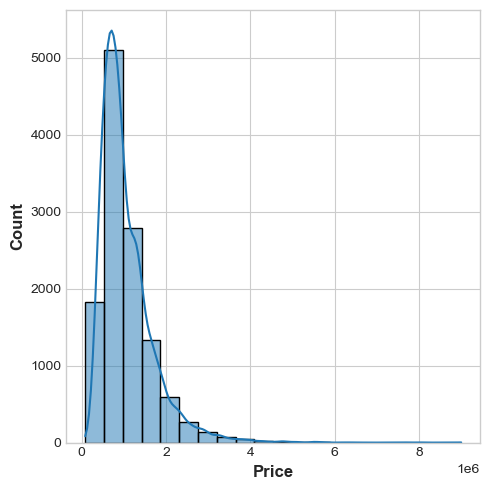

In [13]:
fig, axes = plt.subplots(1, 1, figsize=(5, 5), dpi=100)
sns.histplot(
    data = df,
    x = df['Price'],
    kde = True,
    bins = 20
)

## Distribution of the categoric variables

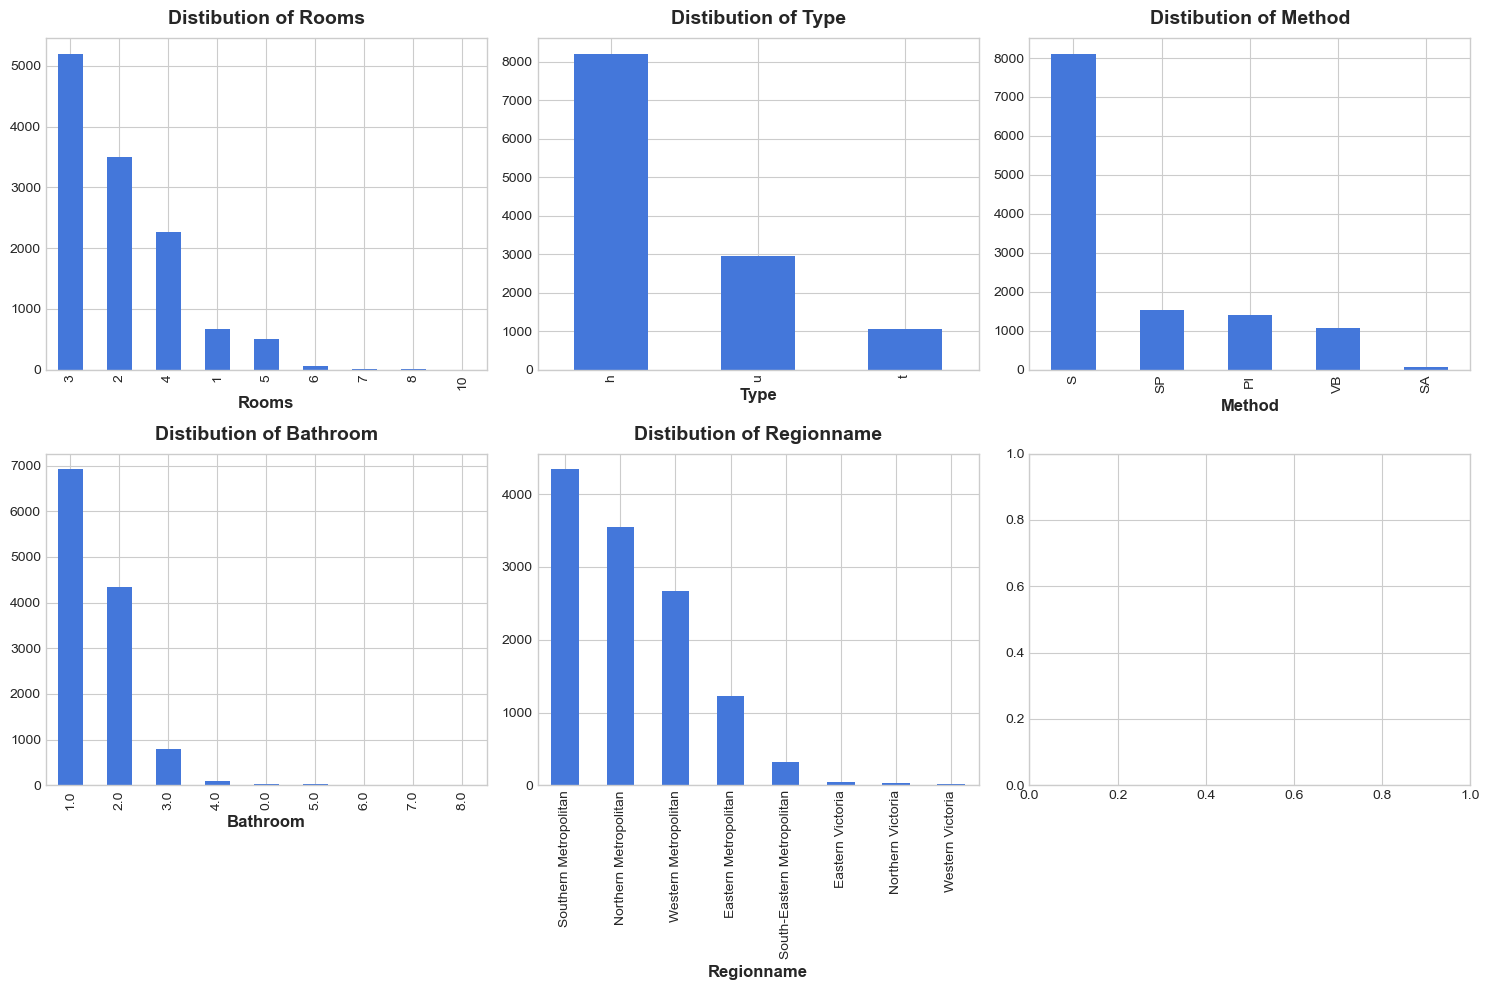

In [49]:
def plot_bar(df, cols):
    fig, axes = plt.subplots(2, 3, figsize=(15, 10), dpi=100)
    axes = axes.flatten()

    for i, col in enumerate(cols):
        counts = df[col].value_counts()
        counts.plot.bar(ax = axes[i],color= "#4477DA")
        axes[i].set_title("Distibution of " + col)
        axes[i].set_xlabel(col)
    plt.tight_layout()
    plt.show()
    
plot_bar(df, categorical_variables)

## Distribution of the numeric variables

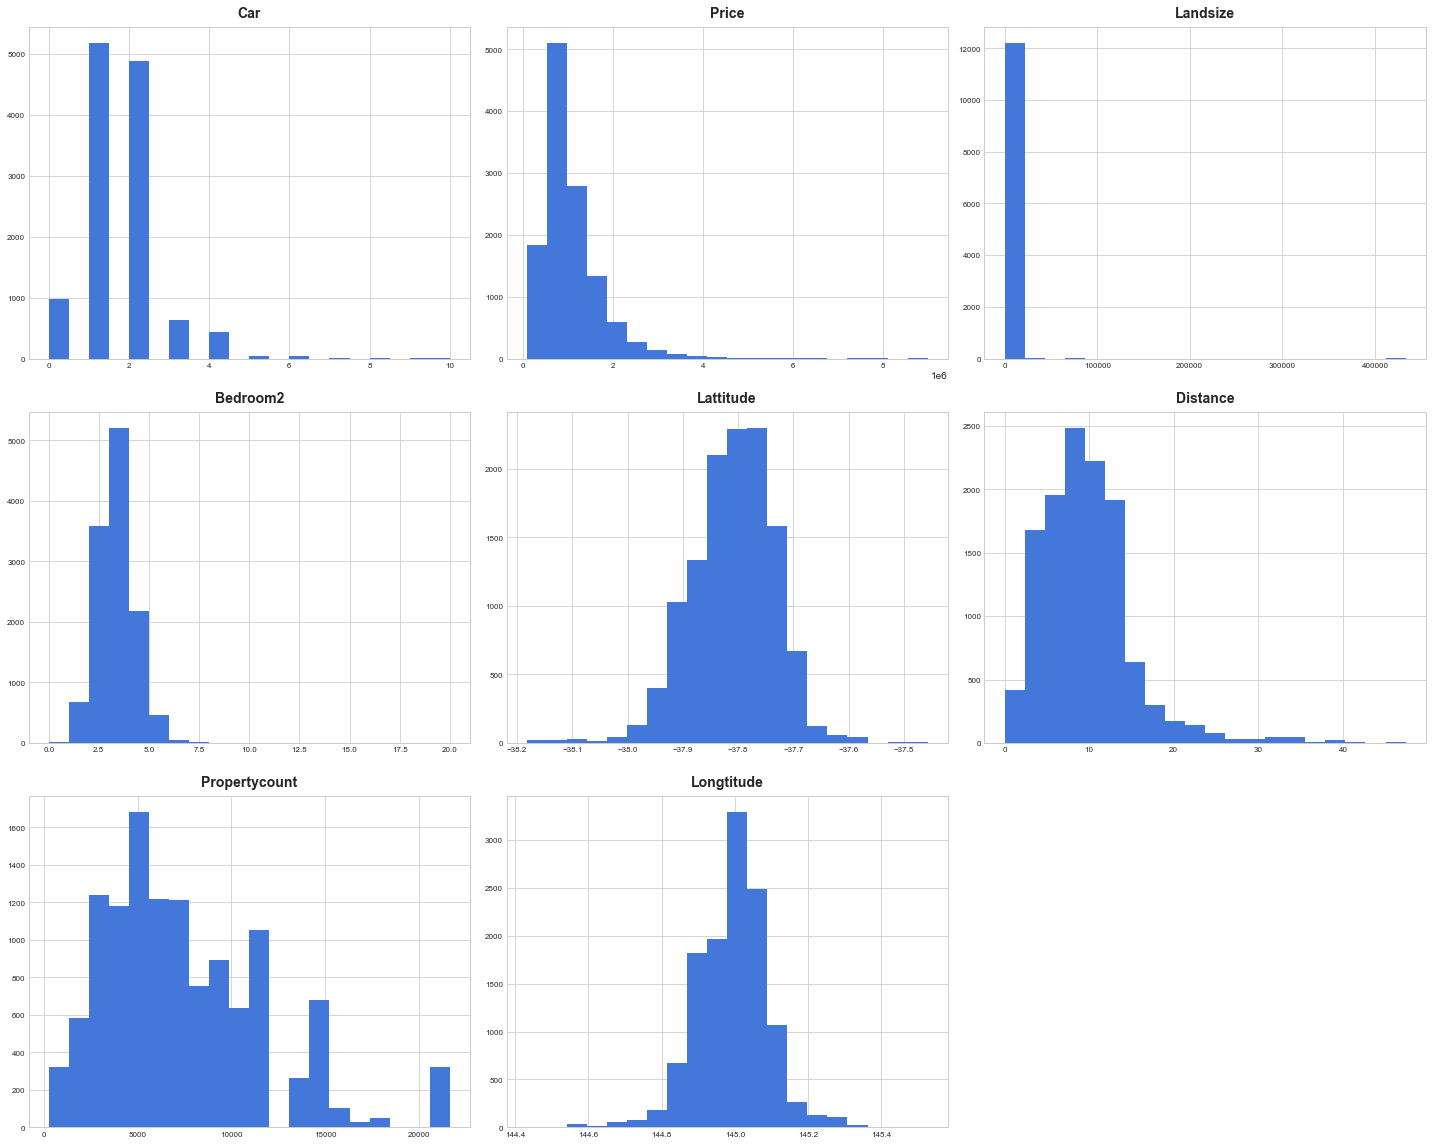

In [50]:
num = df[numeric_variables]
num.hist(figsize=(20, 16), bins=20, xlabelsize=8, ylabelsize=8,color = "#4477DA");

## Correlation

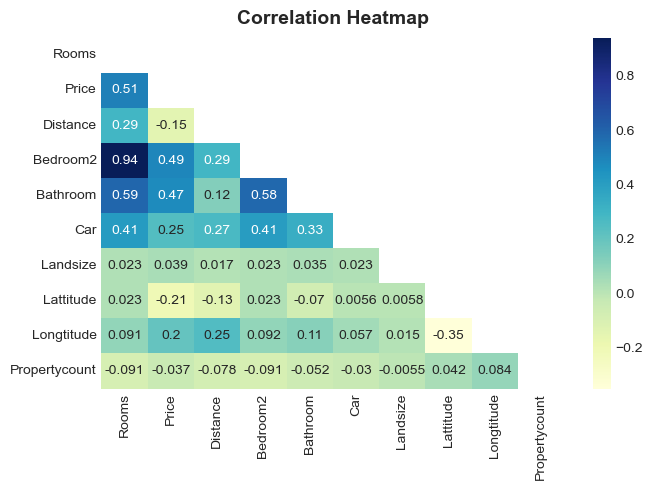

In [51]:
# Plot correlation heatmap
plt.figure(figsize=(7, 5), dpi=100)
corr_matrix = df.corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, annot=True, mask=mask, cmap='YlGnBu')
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

## Data Preprocessing - Features engeneering

#### Combining minority classes

In [14]:
df['Rooms'] = df['Rooms'].replace({6: "=< 6", 7: "=< 6", 8:"=< 6",10:"=< 6"})
df['Rooms'].value_counts()

3       5198
2       3491
4       2269
1        670
5        507
=< 6      76
Name: Rooms, dtype: int64

In [15]:
df['Regionname'] = df['Regionname'].replace({"Eastern Victoria": "Victoria", "Northern Victoria": "Victoria", "Western Victoria":"Victoria"})
df['Regionname'].value_counts()

Southern Metropolitan         4340
Northern Metropolitan         3554
Western Metropolitan          2668
Eastern Metropolitan          1229
South-Eastern Metropolitan     325
Victoria                        95
Name: Regionname, dtype: int64

In [16]:
df['Bathroom'] = df['Bathroom'].replace({4:"=< 4", 5:"=< 4",6:"=< 4",7:"=< 4",8:"=< 4"})
df['Bathroom'].value_counts()

1.0     6918
2.0     4341
3.0      791
=< 4     127
0.0       34
Name: Bathroom, dtype: int64

## Boxcox transformation

In [17]:
df["Price"].skew()

2.269241506759454

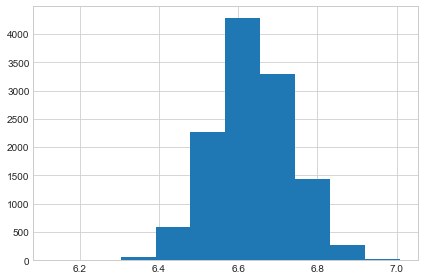

In [18]:
from scipy.stats import boxcox
bxcx = boxcox(df["Price"])
array = bxcx[0]
lamda = bxx = bxcx[1]
plt.hist(array);

In [19]:
df["Price"] = array
df["Price"].skew()

0.0011866317392315645

## Feature Utility Scores 

In [20]:
X = df.copy()
y = X.pop("Price")

# Label encoding for categoricals
for colname in X.select_dtypes("object"):
    X[colname], _ = X[colname].factorize()


In [21]:

discrete_features = X.dtypes == int  # All discrete features should now have integer dtypes 


from sklearn.feature_selection import mutual_info_regression

def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores
mi_scores =  make_mi_scores(X,y,discrete_features) 
mi_scores

Rooms            0.236859
Suburb           0.227694
Bedroom2         0.220485
CouncilArea      0.220132
Type             0.189556
Distance         0.185138
Propertycount    0.183654
Landsize         0.157319
Longtitude       0.137001
Lattitude        0.134104
Bathroom         0.124537
Address          0.124434
Method           0.117497
SellerG          0.116323
Car              0.097052
Regionname       0.095132
Name: MI Scores, dtype: float64

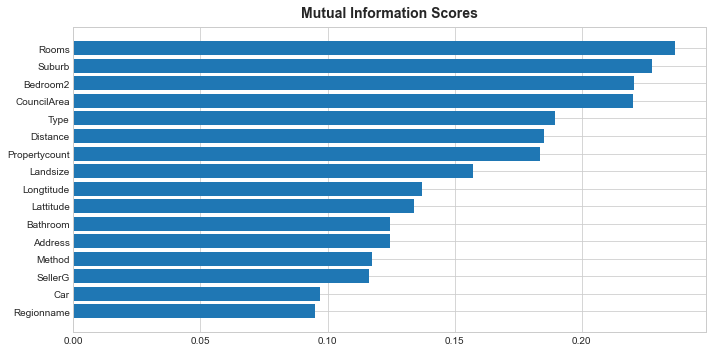

In [22]:
def plot_mi_scores(scores):
    fig, ax = plt.subplots(figsize=(10,5))
    scores = scores.sort_values(ascending = True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")
    
    
plot_mi_scores(mi_scores)

## Train-Test Split

In [23]:
from sklearn.model_selection import train_test_split




# Divide data into training and validation subsets
X_train_full, X_valid_full, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2,
                                                                random_state=0)

# "Cardinality" means the number of unique values in a column
# Select categorical columns with relatively low cardinality (convenient but arbitrary)
categorical_cols = [cname for cname in X_train_full.columns if X_train_full[cname].nunique() < 10 and 
                        X_train_full[cname].dtype == "object"]

# Select numerical columns
numerical_cols = [cname for cname in X_train_full.columns if X_train_full[cname].dtype in ['int64', 'float64']]

# Keep selected columns only
my_cols = categorical_cols + numerical_cols
X_train = X_train_full[my_cols].copy()
X_valid = X_valid_full[my_cols].copy()

## Scaling

In [24]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(X_train)
X_train = pd.DataFrame(df_scaled, columns = X_train.columns)
df_scaled = scaler.transform(X_valid)
X_valid = pd.DataFrame(df_scaled, columns = X_valid.columns)
X_valid.describe().round(3).T

,count,mean,std,min,25%,50%,75%,max
Suburb,2443.0,0.030,1.020,-1.354,-0.734,-0.097,0.411,3.881
Address,2443.0,0.016,0.988,-1.718,-0.844,0.030,0.877,1.736
Rooms,2443.0,0.004,0.990,-1.016,-1.016,-0.165,0.687,3.241
Type,2443.0,0.003,1.013,-0.644,-0.644,-0.644,0.915,2.473
Method,2443.0,0.029,1.035,-0.625,-0.625,-0.625,0.351,3.280
SellerG,2443.0,0.023,1.048,-0.782,-0.700,-0.287,0.373,6.067
Distance,2443.0,0.012,1.010,-1.647,-0.664,-0.100,0.518,6.849
Bedroom2,2443.0,-0.003,1.037,-2.982,-0.903,0.136,0.136,17.805
Bathroom,2443.0,-0.006,1.015,-0.769,-0.769,-0.769,0.687,5.055
Car,2443.0,0.028,1.034,-1.662,-0.602,-0.602,0.457,8.931


## Modelling

### Helper function

In [31]:
def residuals_plot(y_pred):
    '''
    1) Ploting scatter plot
    2) Plotting histogram'''
    
    resids = np.subtract(y_valid,y_pred)
    
    fig, ax = plt.subplots(1, 2, figsize=(15, 5))

    # Left: Sxatter plot
    ax[0] = sns.regplot(y_pred,resids, fit_reg = False, ax=ax[0])
    ax[0].set_xlabel('Residual values')
    ax[0].set_ylabel('Count')
    ax[0].set_title('Scatter of residuals')

    # Right: Histogram
    ax[1] = sns.distplot(resids, ax=ax[1])
    ax[1].set_xlabel('Residual values')
    ax[1].set_ylabel('Count')
    ax[1].set_title('Histogram of residuals')
    plt.show()

## Random Forest Regressor

In [25]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
#Create a Randomodelm Forest Classifier object
baseline = RandomForestRegressor(n_estimators = 200, random_state=0)


In [26]:
# Train the classifier


rfc = baseline.fit(X_train, y_train)
# Make predictions
yhat_train1 = rfc.predict(X_train)
yhat_test1 = rfc.predict(X_valid)

In [27]:
from sklearn import metrics 
from sklearn.metrics import r2_score,mean_squared_error


In [28]:
#Evaluate the model using r2 and mean squared
train_mse = mean_squared_error(y_train, yhat_train1)
test_mse = mean_squared_error(y_valid, yhat_test1)
train_r2 = r2_score(y_train, yhat_train1)
test_r2 = r2_score(y_valid, yhat_test1)
#Print the evaluation metrics
print("Train MSE:           ",train_mse)
print("Test MSE:            ",test_mse)
print("Train R_Squareg:     ",train_r2)
print("Test R_Squared:      ",test_r2 )

Train MSE:            0.00018626967342544415
Test MSE:             0.001294920581781191
Train R_Squareg:      0.980601746733645
Test R_Squared:       0.8667901709473267


## Linear Regression

In [29]:
from sklearn.linear_model import LinearRegression
lre=LinearRegression()
### training -fitting- the model
lre.fit(X_train, y_train)
yhat_train2 = lre.predict(X_train)
yhat_test2 = lre.predict(X_valid)

In [30]:
#Evaluate the model using r2 and mean squared
train_mse = mean_squared_error(y_train, yhat_train2)
test_mse = mean_squared_error(y_valid, yhat_test2)
train_r2 = r2_score(y_train, yhat_train2)
test_r2 = r2_score(y_valid, yhat_test2)
#Print the evaluation metrics
print("Train MSE:           ",train_mse)
print("Test MSE:            ",test_mse)
print("Train R_Squareg:     ",train_r2)
print("Test R_Squared:      ",test_r2 )

Train MSE:            0.0033182418156305266
Test MSE:             0.003718131279188898
Train R_Squareg:      0.6544359908142823
Test R_Squared:       0.6175119624596079


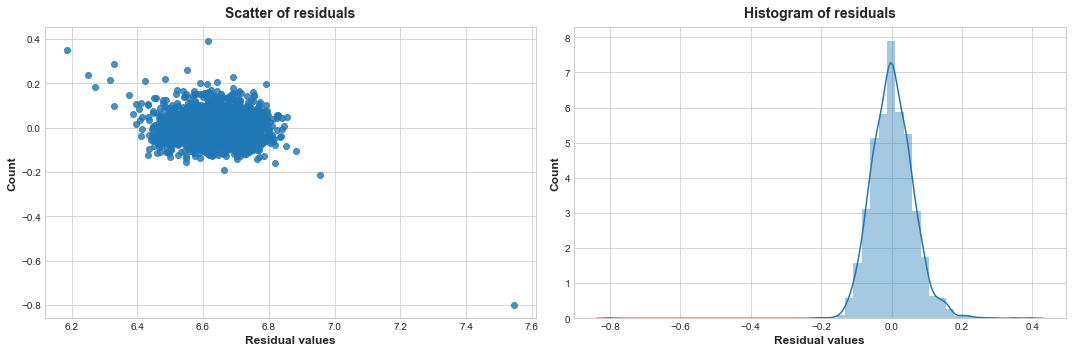

In [32]:
residuals_plot(yhat_test2)

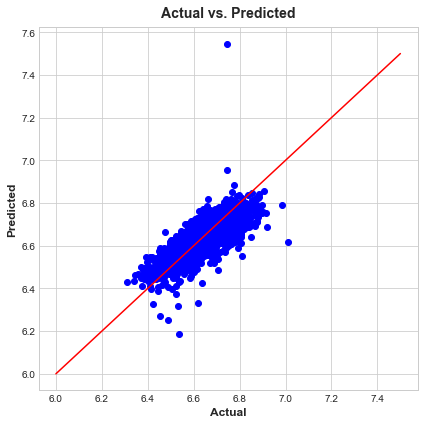

In [33]:
# Plot actual vs. predicted values for Decision Tree
plt.figure(figsize=(6,6))
plt.scatter(y_valid, yhat_test2, color='b')
plt.plot(np.array([6,7.5]), np.array([6,7.5]), color='red')
plt.title('Actual vs. Predicted') 
plt.xlabel('Actual')
plt.ylabel('Predicted')

plt.show()

## Result:
### **The best model based on test R2 IS : Random forest Classifier**